# Cálculo de transformaciones de la serie del PIB de Costa Rica

*Material del curso EC4301 Macroeconometría*

Universidad de Costa Rica

**Profesor:  Randall Romero Aguilar**

Actualizado: 2025-Ago-07

## Cargar paquetes necesarios

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bccr import SW
plt.style.use('seaborn-v0_8')
plt.style.use('seaborn-v0_8-talk')

figpath = '../figures/'

SAVEFIG = False

## Importar los datos

In [3]:
pib = SW(Original=86765, Desestacionalizado=87198,TendenciaCiclo=87510)  

pib /=1e6
pib.index.name=''
#pib = pd.read_csv('CR-PIB.csv', index_col=0, parse_dates=True)
#pib

In [4]:
def figura(datos, titulo, y, archivo=None):
    fig, axs = plt.subplots(1,3, figsize=[18,4], sharey=True)
    datos.plot(ax=axs, legend="", subplots=True)
    fig.suptitle(titulo, size=18)
    axs[0].set(ylabel=y)
    for ax, serie in zip(axs, datos):
        ax.set_title(serie)

    if archivo and SAVEFIG:
        fig.savefig(figpath + archivo + ".png", bbox_inches='tight')
    
    return axs

### Nivel de la serie

* Antes de modelar una serie de tiempo, es útil representarla con un gráfico para detectar algunas de sus propiedades.
* En este caso: el PIB
    -  muestra una tendencia positiva
    - tiene variaciones estacionarias
* En lo que sigue, nos referimos a esta serie en nivel como $y_t$.

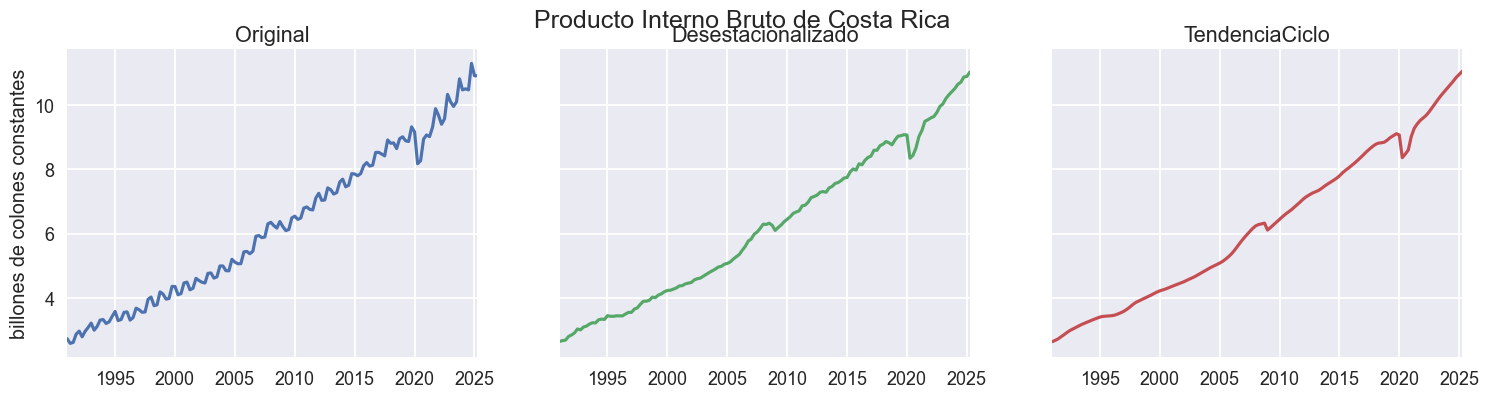

In [5]:
figura(pib, 'Producto Interno Bruto de Costa Rica', 'billones de colones constantes', 'pib');

### Primera diferencia de la serie

\begin{equation*}
\Delta y_t \equiv y_t - y_{t-1}
\end{equation*}


* Esta transformación
    - elimina la tendencia de la serie,
    - mantiene las oscilaciones estacionales.


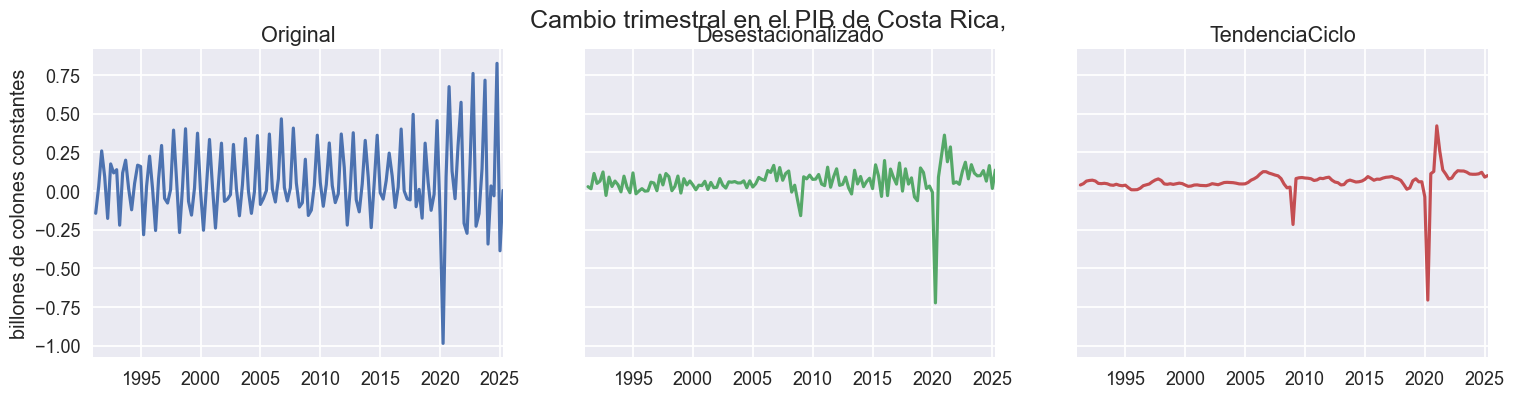

In [6]:
figura(pib.diff(1), 'Cambio trimestral en el PIB de Costa Rica,','billones de colones constantes', 'd_pib');

### Tasa de crecimiento de la serie

\begin{equation*}
\Delta\% y_t \equiv \frac{y_t - y_{t-1}}{y_{t-1}} \times 100
\end{equation*}


* Elimina tendencia, mantiene estacionalidad.
* Limitación: asimetría con respecto a cambios positivos y negativos: Subir de 100 a 125 (aumento de 25\%), bajar de 125 a 100 (caída de “solo” 20\%).


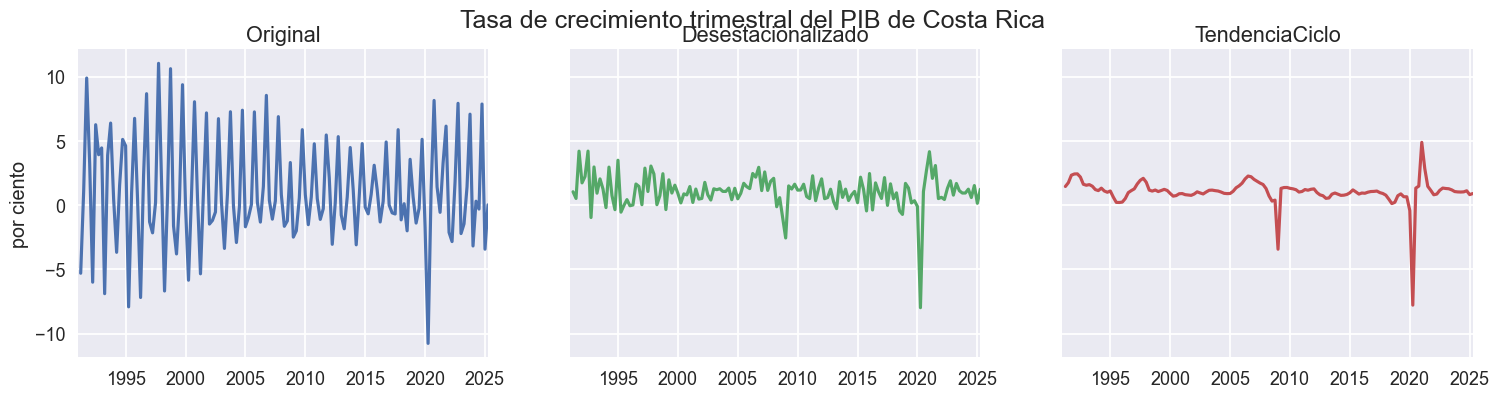

In [7]:
figura(100*pib.pct_change(1), 'Tasa de crecimiento trimestral del PIB de Costa Rica', 'por ciento', 'dpc_pib');

### Tasa “continua” de crecimiento de la serie

\begin{equation*}
\Delta\% y_t \approx \left(\ln y_t - \ln y_{t-1}\right)\times 100
\end{equation*}

* Similar a la anterior porque $\ln(1+x)\approx x$ si $x$ es “pequeño”
* Ventaja: simetría con respecto a cambios positivos y negativos

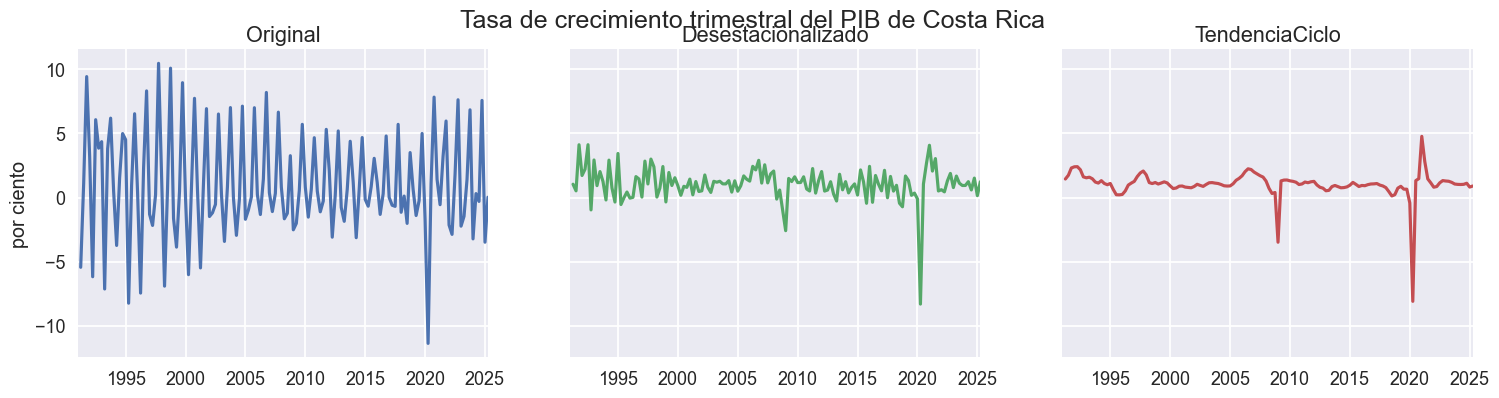

In [8]:
figura(100*np.log(pib).diff(), 'Tasa de crecimiento trimestral del PIB de Costa Rica', 'por ciento', 'dlog_pib');

### Diferencia interanual de la serie

\begin{equation*}
\Delta_4 y_t \equiv y_t - y_{t-4}
\end{equation*}

* Elimina tanto la tendencia como el componente estacional
* Nótese la fuerte disminución del PIB durante la crisis de 2008.


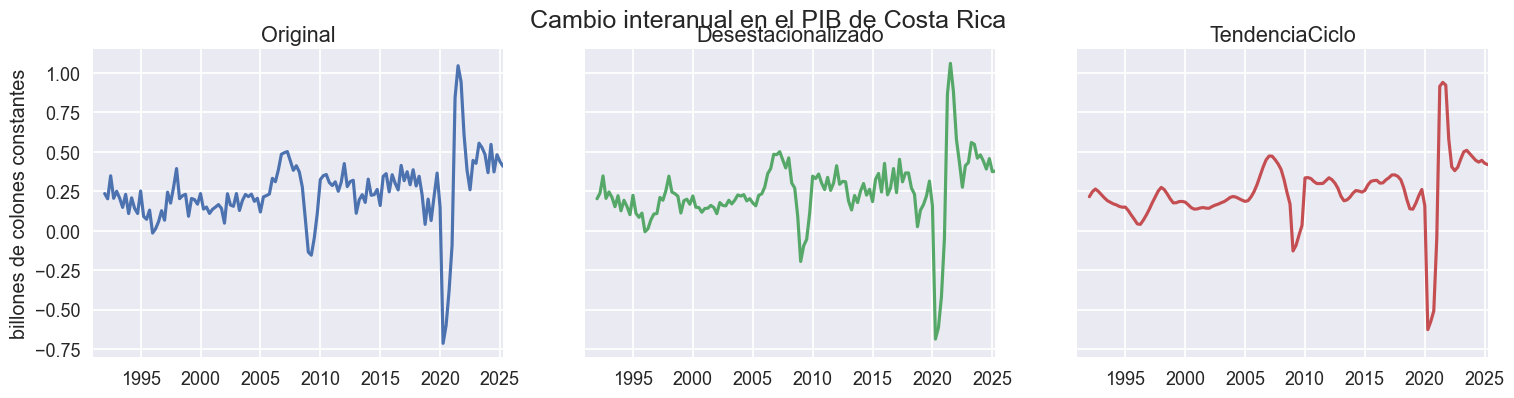

In [9]:
figura(pib.diff(4), 'Cambio interanual en el PIB de Costa Rica','billones de colones constantes', 'd4_pib');

### Tasa de crecimiento interanual

\begin{equation*}
\Delta_4\% y_t \approx \left(\ln y_t - \ln y_{t-4}\right)\times 100
\end{equation*}

* Equivalente a la suma de las tasas de crecimiento de los cuatro trimestres comprendidos en el año:

\begin{align*}
\Delta_4\% y_t &\approx \left(\ln y_t - \ln y_{t-4}\right)\times 100 \\
  &= \left(\ln y_{t} - \ln y_{t-1} + \ln y_{t-1} - \ln y_{t-2} + \ln y_{t-2} - \ln y_{t-3} + \ln y_{t-3} - \ln y_{t-4}\right)\times 100 \\
  &= \Delta\% y_{t} + \Delta\% y_{t-1} + \Delta\% y_{t-2} + \Delta\% y_{t-3}
\end{align*}


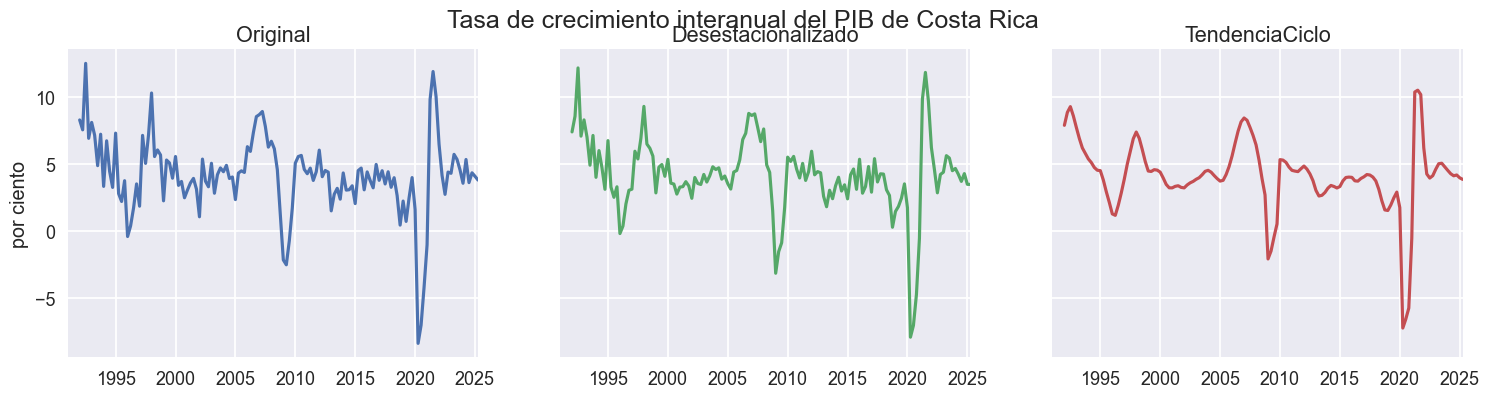

In [10]:
figura(100*np.log(pib).diff(4), 'Tasa de crecimiento interanual del PIB de Costa Rica', 'por ciento', 'd4pc_pib');

### Serie suavizada por media móvil

\begin{equation*}
y^s_t \equiv \tfrac{1}{4}\left(y_t + y_{t-1} + y_{t-2} + y_{t-3}\right)
\end{equation*}

* Elimina el componente estacional, pero manteniendo la tendencia
* Se observa un cambio estructural en 2008-2009.

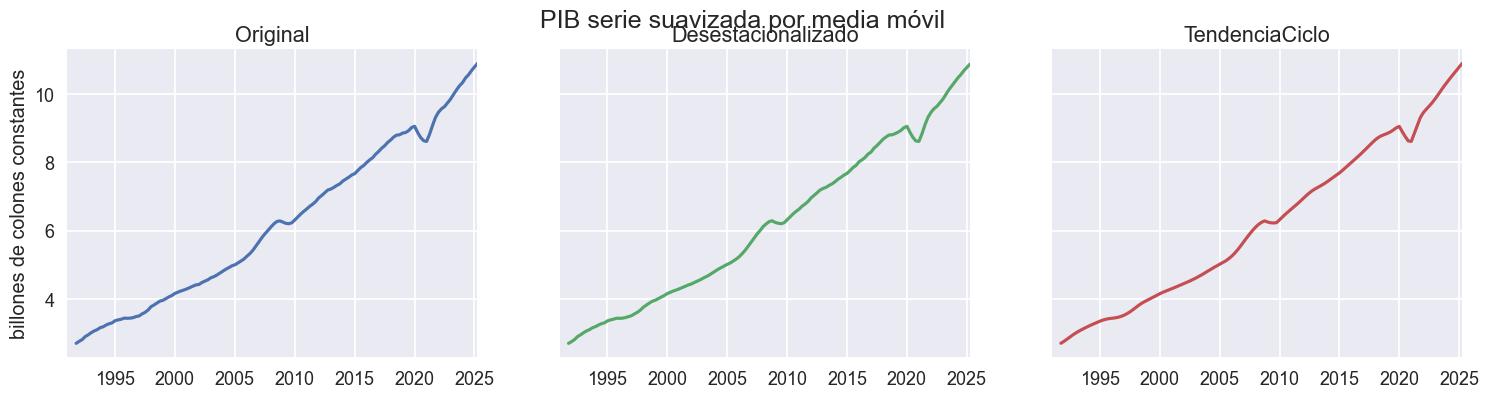

In [11]:
#pib2 = pd.concat([pib, pib.rolling(4).mean()], axis=1)
#pib2.columns = ['Serie original', 'Serie suavizada']
figura(pib.rolling(4).mean(), 'PIB serie suavizada por media móvil', 'billones de colones constantes', 'pib_ma');

In [12]:
pib.rolling(4).mean()

,Original,Desestacionalizado,TendenciaCiclo
,,,
1991Q1,NaN,NaN,NaN
1991Q2,NaN,NaN,NaN
1991Q3,NaN,NaN,NaN
1991Q4,2.701184,2.700516,2.703709
1992Q1,2.760241,2.751350,2.757866
...,...,...,...
2024Q2,10.474983,10.476250,10.470479
2024Q3,10.568283,10.574050,10.579309
2024Q4,10.688787,10.688420,10.690928


In [13]:
def marcar_episodio(ax, nombre, serie, fecha, dx, dy, ha):
    fecha = pd.Period(fecha,freq='Q')
    ax.annotate(nombre, 
             (fecha, serie.loc[fecha]), 
             (fecha+dx, serie.loc[fecha]+dy), 
             fontsize=16, color="#047C65",
             arrowprops=dict(width=2, color="#06AF8F",shrink=0.05),
             ha=ha             
             )

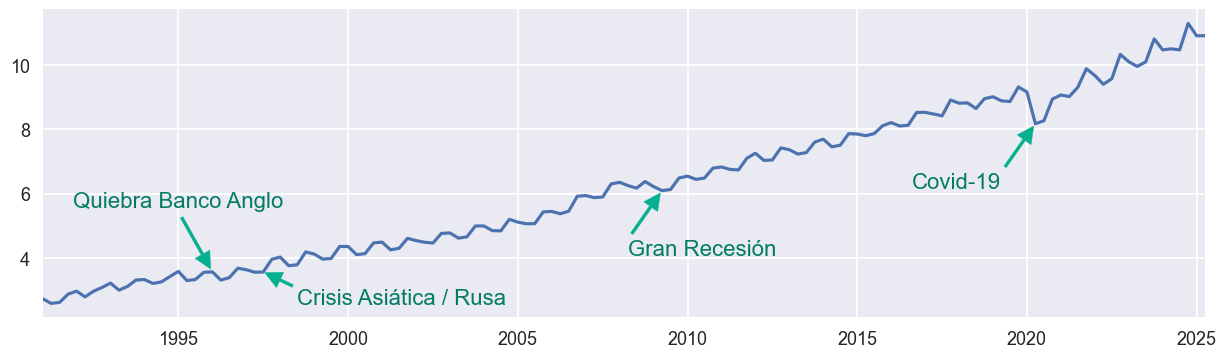

In [14]:
fig, ax = plt.subplots(figsize=[15,4])
pib['Original'].plot(ax=ax)
marcar_episodio(ax, 'Quiebra Banco Anglo', pib['Original'], '1996Q1',-4, 2, 'center')
marcar_episodio(ax, 'Crisis Asiática / Rusa', pib['Original'], '1997Q3',4, -1, 'left')
marcar_episodio(ax, 'Gran Recesión', pib['Original'],'2009Q2',-4, -2, 'left')
marcar_episodio(ax, 'Covid-19', pib['Original'],'2020Q2',-4, -2, 'right')
fig.savefig(figpath + "pib-original.png", bbox_inches='tight')

In [15]:
creci_trimestral = 400 * pib['TendenciaCiclo'].pct_change(1)
creci_interanual=  100 * pib['TendenciaCiclo'].pct_change(4)

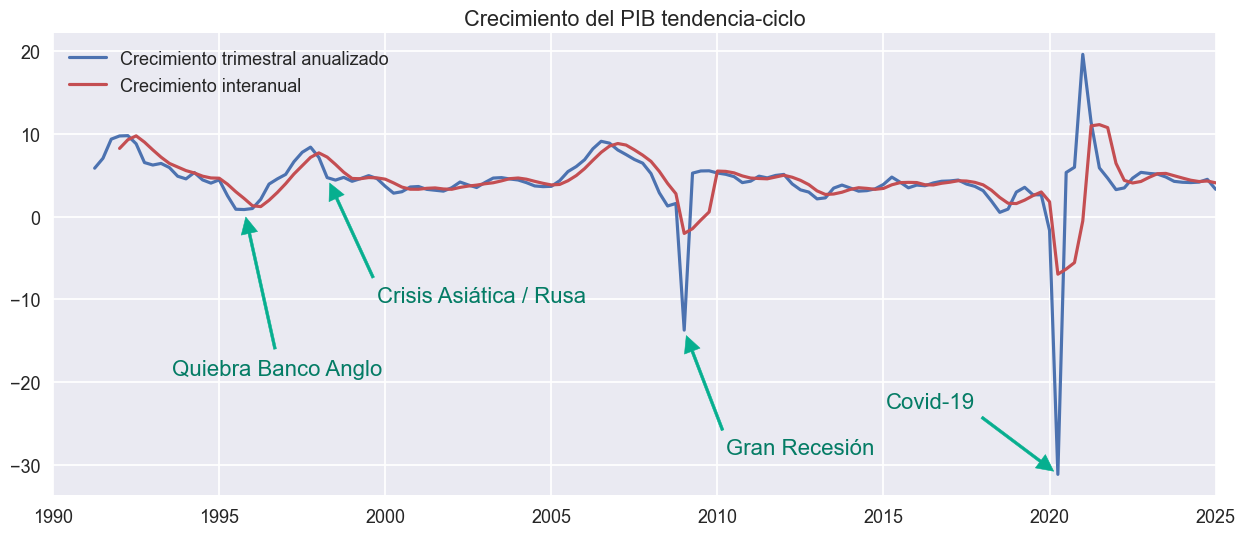

In [16]:
fig, ax = plt.subplots(1,1,figsize=[15,6], sharex=True, sharey=True)
creci_trimestral.plot(ax=ax, label='Crecimiento trimestral anualizado')
creci_interanual.plot(ax=ax, color='C2', label='Crecimiento interanual')

marcar_episodio(ax, 'Quiebra Banco Anglo', creci_trimestral, '1995Q4',4, -20, 'center')
marcar_episodio(ax, 'Crisis Asiática / Rusa', creci_trimestral, '1998Q2',6, -15, 'left')
marcar_episodio(ax, 'Gran Recesión', creci_trimestral,'2009Q1',5, -15, 'left')
marcar_episodio(ax, 'Covid-19', creci_trimestral,'2020Q2',-10, 8, 'right')
ax.set(title='Crecimiento del PIB tendencia-ciclo')

ax.legend()
ax.set_xlim('1990','2025')
fig.savefig(figpath + "pib-tendencia-ciclo.png", bbox_inches='tight')


In [17]:
pib.tail()

,Original,Desestacionalizado,TendenciaCiclo
,,,
2024Q2,10.506543,10.648597,10.632542
2024Q3,10.474887,10.712038,10.742947
2024Q4,11.299595,10.875843,10.863506
2025Q1,10.912600,10.892002,10.952746
2025Q2,10.915530,11.027281,11.051888


In [33]:
pib.index.name = 'trimestre'
#pib.index = pib.index.to_timestamp()
pib.reset_index().to_stata('pib.dta', convert_dates={'trimestre':'tq'}, version=118, write_index=False)